In [1]:
import  pandas as pd 
import matplotlib.pyplot as plt 


%matplotlib inline 

In [2]:
titanic = pd.read_csv('../data/train_titanic.csv')

In [3]:
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#### What is the survival rate on the ship?

In [4]:
## mean of survived column
titanic['Survived'].mean()


0.3838383838383838

In [5]:
## child survival rate 
child = titanic['Age'] < 18
titanic.loc[child,'Survived'].mean()

0.5398230088495575

#### What is the survival rate of passengers from cherbourg (`c` in the dataframe) ?

In [6]:
### using boolean filtering 
titanic.loc[titanic['Embarked'] == 'C', 'Survived'].mean()

0.5535714285714286

#### A Mask for all of the "S" columns

In [7]:
### making the mask using a list comprehension 
starts_with_s = [col[0].lower() == 's' for col in titanic.columns]

titanic.loc[:, starts_with_s].head()

Survived     Sex  SibSp
0         0    male      1
1         1  female      1
2         1  female      0
3         1  female      1
4         0    male      0

In [8]:
### using the mask I created above - but now I'm masking out the columns 

In [9]:
## A manual mask the achieves the same result 
titanic.loc[:,[False,True,False,False,True,False,True,False,False
              ,False,False]].head(2)

IndexError: Item wrong length 11 instead of 12.

In [10]:
## example of a mask that grabs everything not (becuase of the tilde) in the list ['male','female'] 

bool_filter = ~titanic['Embarked'].isin(['C', 'S'])
titanic.loc[bool_filter, :].head()


PassengerId  Survived  Pclass                           Name     Sex  \
5             6         0       3               Moran, Mr. James    male   
16           17         0       3           Rice, Master. Eugene    male   
22           23         1       3    McGowan, Miss. Anna "Annie"  female   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female   
32           33         1       3       Glynn, Miss. Mary Agatha  female   

     Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
5    NaN      0      0  330877   8.4583   NaN        Q  
16   2.0      4      1  382652  29.1250   NaN        Q  
22  15.0      0      0  330923   8.0292   NaN        Q  
28   NaN      0      0  330959   7.8792   NaN        Q  
32   NaN      0      0  335677   7.7500   NaN        Q

### I want a new column - 18 and under as "child" 19-49 as "adult" 50 and over as "senior" how do I do that?


First we need to deal with the null values - a few options 

In [11]:
## titanic has null values 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
### Option 1 to fill nulls 

titanic['Age'] = titanic['Age'].fillna(-99)

In [13]:
## Boolean filter option to fill age (using 99 right now  )

titanic.loc[titanic['Age'].isnull(), 'Age'] = -99

In [14]:
titanic.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [15]:
### which rows have age = 99?
missing_age = titanic['Age'] == -99

titanic_valid_age = titanic.loc[~missing_age, :].copy()

In [16]:
titanic_valid_age.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [17]:
### drop where age = 99 (this dataframe isn't being returned - not saved as a variable)



In [18]:
### setting up my function that takes in an age and returns 'Child' if the age is below 18, 'Adult' if between 18 and 60 and 'Senior' if above 60

def age_bins(age):
    if age < 18:
        return "Child"
    if age > 60:
        return "Senior"
    else:
        return "Adult"


"""
Now I'm using .map() to apply my functions to every element in the 'Age' column - then saving the output in a
New column called "Age_binned"
"""

titanic["Age Bin"] = titanic["Age"].map(age_bins)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age Bin  
0      0         A/5 21171   7.2500   NaN        S   Adult  
1      0          PC 17599  71.2833   C85        C   Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S   Adult  
3      0            113803  53.1000  C123        S   Adult  
4      0            373450   8.0500   NaN        S   Adult

In [19]:
## function returns "Adult" when you input 22



In [20]:
## function returns "Child" when you input 17



In [21]:
# function returns "Senior when you input 65



In [22]:
## groupby statement 

titanic.groupby('Age Bin')['Survived'].mean()

Age Bin
Adult     0.386874
Child     0.389655
Senior    0.227273
Name: Survived, dtype: float64

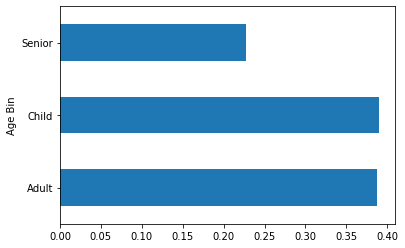

In [23]:
### groupby plot 
titanic.groupby('Age Bin')['Survived'].mean().plot.barh();

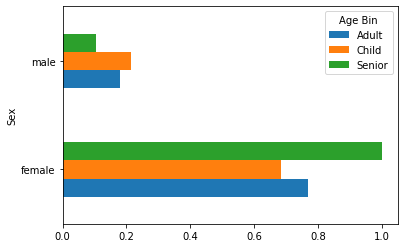

In [24]:
titanic.groupby(['Sex', 'Age Bin'])['Survived'].mean().unstack().plot.barh();

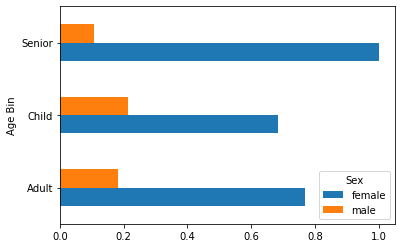

In [25]:
### 
titanic.groupby(['Age Bin', 'Sex'])['Survived'].mean().unstack().plot.barh();